In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [27]:
# Read the csv file into a pandas DataFrame

combined_df = pd.read_csv('../combined_data.csv')
combined_df.head()

,win shares,mins played (per game),player,games,year,rank,points(per game),ws/48,box +/-,value overall replacement player,...,turnover_percentage,turnovers,win_shares_per_40_minutes,assists_per_40,blocks_per_40,points_per_40,steals_per_40,three_pointers_per_40,total_rebounds_per_40,turnovers_per_40
0,48.0,30.6,Kenyon Martin,757,2000,1,12.3,0.100,0.7,15.5,...,14.3,139.0,0.346,2.781587,5.719882,25.053869,2.428991,0.039177,17.022527,2.722821
1,0.3,15.6,A.J. Guyton,80,2000,32,5.5,0.010,-5.4,-1.1,...,13.6,218.0,0.145,4.944785,0.638037,25.766871,1.582822,3.472393,5.263804,2.674847
2,11.6,14.3,Jake Voskuhl,450,2000,33,4.0,0.087,-2.2,-0.3,...,23.0,160.0,0.237,2.271062,3.534799,15.805861,1.575092,0.000000,16.117216,2.930403
3,0.6,18.7,Khalid El-Amin,50,2000,34,6.3,0.030,-3.8,-0.4,...,15.6,188.0,0.158,8.915775,0.186133,30.711959,3.462075,3.629595,5.937645,3.499302
4,-0.1,10.6,Mike Smith,17,2000,35,3.0,-0.033,-5.5,-0.2,...,20.0,241.0,0.165,3.034056,0.866873,21.919505,1.857585,2.683179,9.267286,4.974200


In [28]:
y = combined_df["class"]

In [29]:
from sklearn.preprocessing import LabelEncoder
y = combined_df["class"]
labels = LabelEncoder()
labels.fit(y)
encoded_y = labels.transform(y)

In [30]:
en_y = encoded_y
combined_df["code"]=en_y
combined_df.head()

,win shares,mins played (per game),player,games,year,rank,points(per game),ws/48,box +/-,value overall replacement player,...,turnovers,win_shares_per_40_minutes,assists_per_40,blocks_per_40,points_per_40,steals_per_40,three_pointers_per_40,total_rebounds_per_40,turnovers_per_40,code
0,48.0,30.6,Kenyon Martin,757,2000,1,12.3,0.100,0.7,15.5,...,139.0,0.346,2.781587,5.719882,25.053869,2.428991,0.039177,17.022527,2.722821,1
1,0.3,15.6,A.J. Guyton,80,2000,32,5.5,0.010,-5.4,-1.1,...,218.0,0.145,4.944785,0.638037,25.766871,1.582822,3.472393,5.263804,2.674847,1
2,11.6,14.3,Jake Voskuhl,450,2000,33,4.0,0.087,-2.2,-0.3,...,160.0,0.237,2.271062,3.534799,15.805861,1.575092,0.000000,16.117216,2.930403,1
3,0.6,18.7,Khalid El-Amin,50,2000,34,6.3,0.030,-3.8,-0.4,...,188.0,0.158,8.915775,0.186133,30.711959,3.462075,3.629595,5.937645,3.499302,0
4,-0.1,10.6,Mike Smith,17,2000,35,3.0,-0.033,-5.5,-0.2,...,241.0,0.165,3.034056,0.866873,21.919505,1.857585,2.683179,9.267286,4.974200,0


In [31]:
encoded_y =encoded_y.reshape(-1, 1)

In [32]:
# # Assign the data to X and y
# X = combined_df[['true_shooting_percentage', 'height']]
# y = combined_df["code"].values.reshape(-1, 1)
# print(X.shape, y.shape)

In [33]:
player_class=combined_df.loc[combined_df["class"] == "Player"]
player_class

# df.loc[df['column_name'] == some_value]

,win shares,mins played (per game),player,games,year,rank,points(per game),ws/48,box +/-,value overall replacement player,...,turnovers,win_shares_per_40_minutes,assists_per_40,blocks_per_40,points_per_40,steals_per_40,three_pointers_per_40,total_rebounds_per_40,turnovers_per_40,code
0,48.0,30.6,Kenyon Martin,757,2000,1,12.3,0.100,0.7,15.5,...,139.000000,0.346,2.781587,5.719882,25.053869,2.428991,0.039177,17.022527,2.722821,1
1,0.3,15.6,A.J. Guyton,80,2000,32,5.5,0.010,-5.4,-1.1,...,218.000000,0.145,4.944785,0.638037,25.766871,1.582822,3.472393,5.263804,2.674847,1
2,11.6,14.3,Jake Voskuhl,450,2000,33,4.0,0.087,-2.2,-0.3,...,160.000000,0.237,2.271062,3.534799,15.805861,1.575092,0.000000,16.117216,2.930403,1
5,20.0,17.3,Eddie House,717,2000,37,7.5,0.077,-1.5,1.6,...,195.000000,0.113,3.916828,0.183752,19.767892,2.495164,2.417795,4.854932,1.885880,1
6,24.7,18.1,Eduardo Nájera,619,2000,38,4.9,0.106,0.3,6.4,...,201.000000,0.183,2.865711,1.186271,21.939354,2.572476,1.132956,12.129290,2.679107,1
7,-0.2,7.3,Lavor Postell,61,2000,39,3.2,-0.025,-8.6,-0.7,...,172.000000,0.115,2.882250,0.815466,20.063269,1.813708,1.293497,10.066784,2.418278,1
10,55.9,32.0,Michael Redd,629,2000,43,19.0,0.134,0.9,14.9,...,151.000000,0.164,4.352995,0.201189,34.366712,2.725194,2.304527,10.845908,2.761774,1
11,0.3,9.4,Dan Langhi,133,2000,31,3.0,0.012,-6.8,-1.5,...,150.000000,0.163,1.331169,0.422078,24.383117,0.941558,2.240260,9.074675,2.435065,1
12,1.3,9.8,Jabari Smith,108,2000,45,3.0,0.058,-4.0,-0.5,...,183.000000,0.196,2.836241,1.463140,17.265053,1.260551,0.562746,11.277434,4.119302,1
14,8.6,15.5,Jason Hart,341,2000,49,4.8,0.078,-1.7,0.3,...,313.000000,0.118,8.612208,0.170058,18.256909,3.996356,1.688430,5.259642,3.802004,1


In [34]:
# Assign the data to X and y
X = player_class[['true_shooting_percentage', 'height']]
y = player_class["code"].values.reshape(-1, 1)
print(X.shape, y.shape)

(617, 2) (617, 1)


In [35]:
# Use train_test_split to create training and testing data

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### END SOLUTION

In [36]:
# Create the model using LinearRegression

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
### END SOLUTION

In [37]:
# Fit the model to the training data and calculate the scores for the training and testing data

### BEGIN SOLUTION
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 1.0
Testing Score: 1.0


Text(0.5, 1.0, 'Residual Plot')

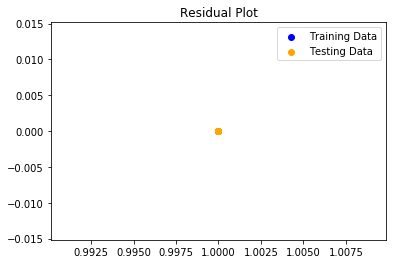

In [38]:
# Plot the Residuals for the Training and Testing data

### BEGIN SOLUTION
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
### END SOLUTION

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Use our model to predict a value
predicted = model.predict(X)

# Score the prediction with mse and r2
mse = mean_squared_error(y, predicted)
r2 = r2_score(y, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

In [ ]:
# Overall Score for the model
model.score(X, y)